In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

In [20]:
housing=pd.read_csv("Housing.csv")
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [21]:
housing.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [22]:
housing.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [23]:
housing["price"].unique()

array([13300000, 12250000, 12215000, 11410000, 10850000, 10150000,
        9870000,  9800000,  9681000,  9310000,  9240000,  9100000,
        8960000,  8890000,  8855000,  8750000,  8680000,  8645000,
        8575000,  8540000,  8463000,  8400000,  8295000,  8190000,
        8120000,  8080940,  8043000,  7980000,  7962500,  7910000,
        7875000,  7840000,  7700000,  7560000,  7525000,  7490000,
        7455000,  7420000,  7350000,  7343000,  7245000,  7210000,
        7140000,  7070000,  7035000,  7000000,  6930000,  6895000,
        6860000,  6790000,  6755000,  6720000,  6685000,  6650000,
        6629000,  6615000,  6580000,  6510000,  6475000,  6440000,
        6419000,  6405000,  6300000,  6293000,  6265000,  6230000,
        6195000,  6160000,  6125000,  6107500,  6090000,  6083000,
        6020000,  5950000,  5943000,  5880000,  5873000,  5866000,
        5810000,  5803000,  5775000,  5740000,  5652500,  5600000,
        5565000,  5530000,  5523000,  5495000,  5460000,  5425

In [24]:
housing.dropna(subset=['price'], inplace=True)
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


##### Visualising Missing values

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


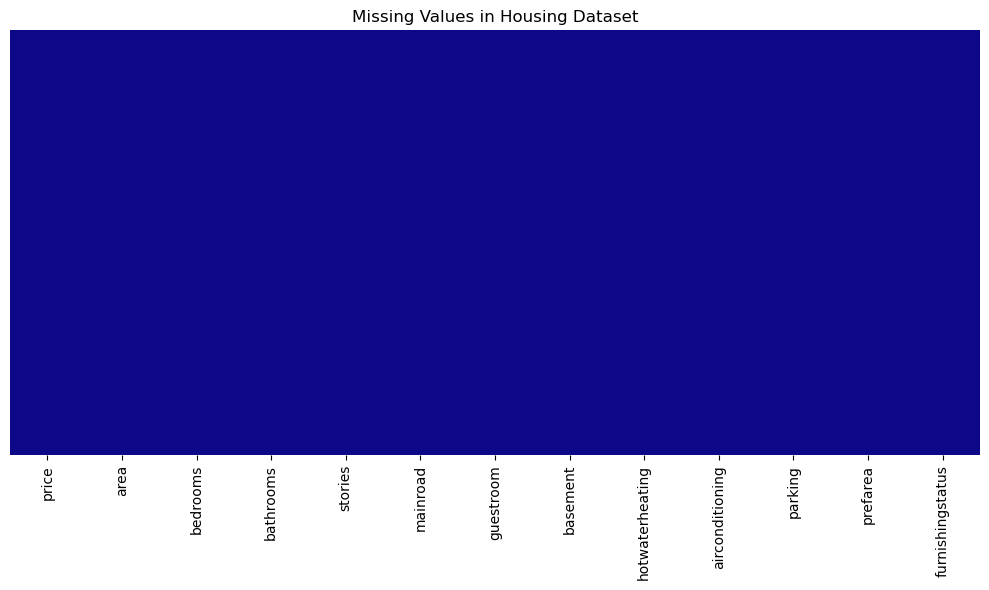

In [25]:
missing_values = housing.isnull().sum()
print(missing_values)
plt.figure(figsize=(10, 6))
sns.heatmap(housing.isnull(), cbar=False, yticklabels=False, cmap='plasma')
plt.title('Missing Values in Housing Dataset')
plt.tight_layout()
plt.show()

#### Replacing missing values with medians using simple imputer

In [26]:
median_imputer = SimpleImputer(strategy='median')
numerical_columns = housing.select_dtypes(include=[np.number]).columns.tolist()
housing[numerical_columns] = median_imputer.fit_transform(housing[numerical_columns])
print("\nMissing values after imputation:")
print(housing.isnull().sum())


Missing values after imputation:
price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


##### For Columns that are categorical, using values that occur most are better to use than using the median.

In [27]:
categorical_columns = housing.select_dtypes(include=['object']).columns.tolist()
if categorical_columns:
    mode_imputer = SimpleImputer(strategy='most_frequent')
    housing[categorical_columns] = mode_imputer.fit_transform(housing[categorical_columns])

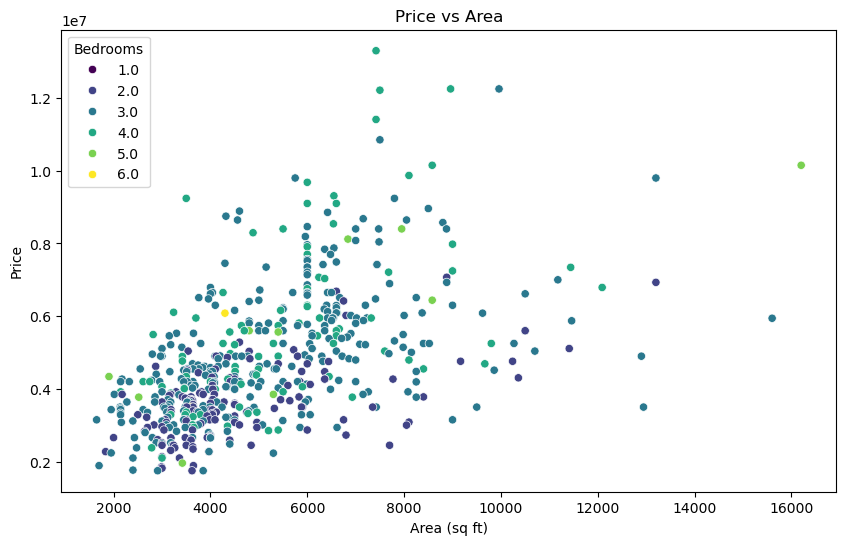

In [28]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='area', y='price', data=housing, hue='bedrooms', palette='viridis')
plt.title('Price vs Area')
plt.xlabel('Area (sq ft)')
plt.ylabel('Price')
plt.legend(title='Bedrooms')
plt.show()

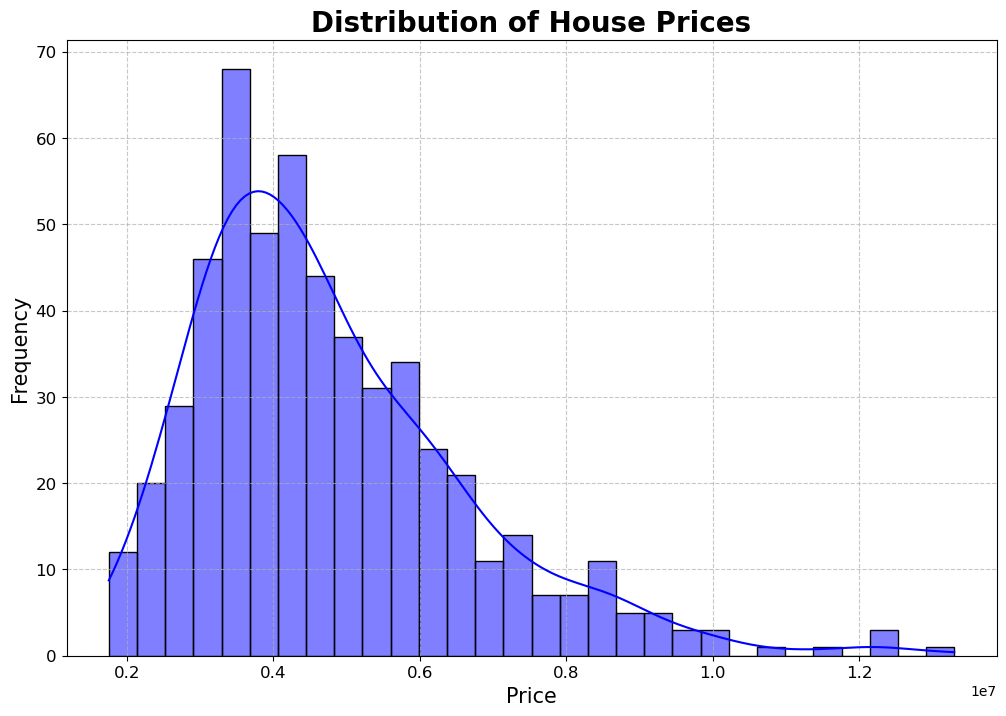

In [29]:
plt.figure(figsize=(12, 8))
sns.histplot(housing['price'], bins=30, kde=True, color='blue', edgecolor='black')
plt.title('Distribution of House Prices', fontsize=20, weight='bold')
plt.xlabel('Price', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

C:\Users\Veerbhadra\AppData\Local\Temp\ipykernel_26780\2222692484.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='bedrooms', data=housing, palette='viridis')


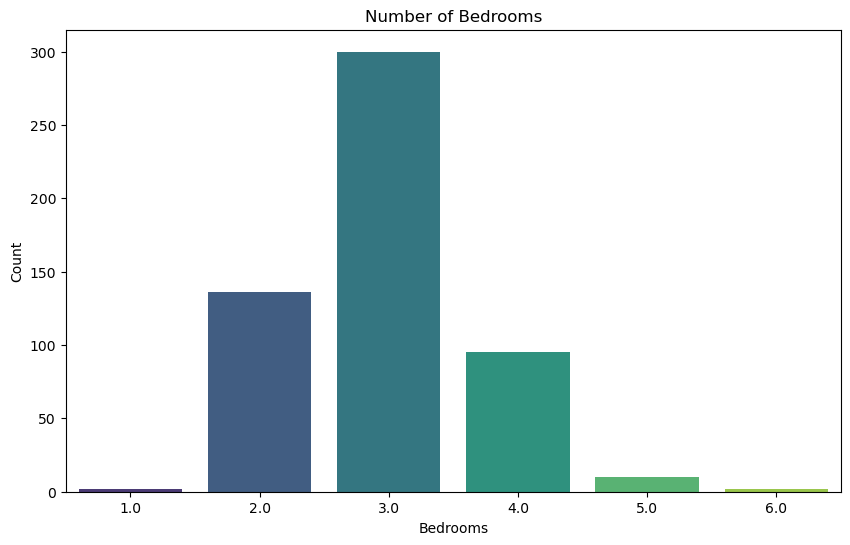

In [30]:
plt.figure(figsize=(10, 6))
sns.countplot(x='bedrooms', data=housing, palette='viridis')
plt.title('Number of Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Count')
plt.show()

C:\Users\Veerbhadra\AppData\Local\Temp\ipykernel_26780\3191789549.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='bathrooms', data=housing, palette='viridis')


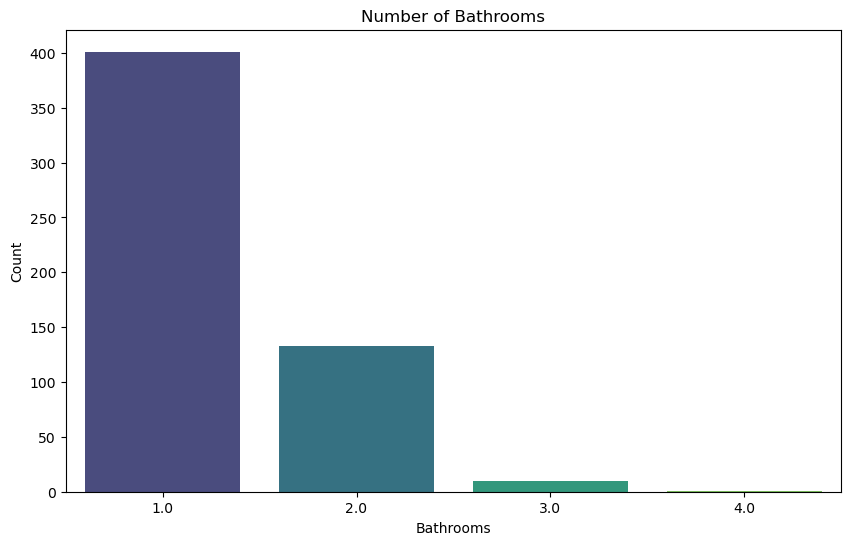

In [31]:
plt.figure(figsize=(10, 6))
sns.countplot(x='bathrooms', data=housing, palette='viridis')
plt.title('Number of Bathrooms')
plt.xlabel('Bathrooms')
plt.ylabel('Count')
plt.show()

# Simple Linear Regression (SLR)

## Introduction  
SLR models the relationship between a **dependent variable (y)** and a single **independent variable (x)** using a straight line.  

Equation:  
$$ y = \beta_0 + \beta_1 x + \epsilon $$  

- $y$: dependent variable  
- $x$: independent variable  
- $\beta_0$: intercept  
- $\beta_1$: slope  
- $\epsilon$: error  

---

## Assumptions  
1. Linearity (relationship is linear)  
2. Independence (observations independent)  
3. Homoscedasticity (constant error variance)  
4. Normality of errors  

---

## Model Fitting (OLS)  
1. Compute means: $\bar{x}, \bar{y}$  
2. Slope:  
$$ \beta_1 = \frac{\sum (x_i - \bar{x})(y_i - \bar{y})}{\sum (x_i - \bar{x})^2} $$  
3. Intercept:  
$$ \beta_0 = \bar{y} - \beta_1 \bar{x} $$  

---

## Model Evaluation  

### R-squared ($R^2$)  
$$ R^2 = 1 - \frac{SS_{res}}{SS_{tot}} $$  

- $SS_{res} = \sum (y_i - \hat{y}_i)^2$ (residual sum of squares)  
- $SS_{tot} = \sum (y_i - \bar{y})^2$ (total variation)  

**Interpretation:**  
- Ranges **0–1**  
- $R^2 = 0.8 \implies$ 80% of variation in $y$ is explained by $x$  
- Higher $R^2$ = better fit  

---

### RMSE (Root Mean Squared Error)  
$$ RMSE = \sqrt{\frac{1}{n}\sum (y_i - \hat{y}_i)^2} $$  

- Lower RMSE = better accuracy  
- Same units as target variable  
- Penalizes large errors  

---

## Strengths & Limitations  
- Easy to interpret & fast  
- Good for linear relationships  
- Fails with non-linear patterns  
- Sensitive to outliers  

---

## Applications  
- House prices vs. square footage  
- Sales vs. ad spend  
- Crop yield vs. rainfall  
- Student performance vs. study hours  

---

## Example  
$$ y = 50{,}000 + 100x $$  

- Base price = \$50,000  
- Each extra sq.ft. adds \$100  

---

## Extensions  
- Multiple Linear Regression (many $x$)  
- Polynomial Regression (non-linear)  
- Regularized Regression (Ridge, Lasso)  


##### Setting up the prediction model.

In [39]:
X=housing[['area','bedrooms','bathrooms']]
y=housing['price']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
model=LinearRegression()

In [42]:
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [43]:
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

In [44]:
print(f"Mean Squared Error: {mse}")
print(f"R-Squared: {r2}")

Mean Squared Error: 2750040479309.0513
R-Squared: 0.45592991188724474


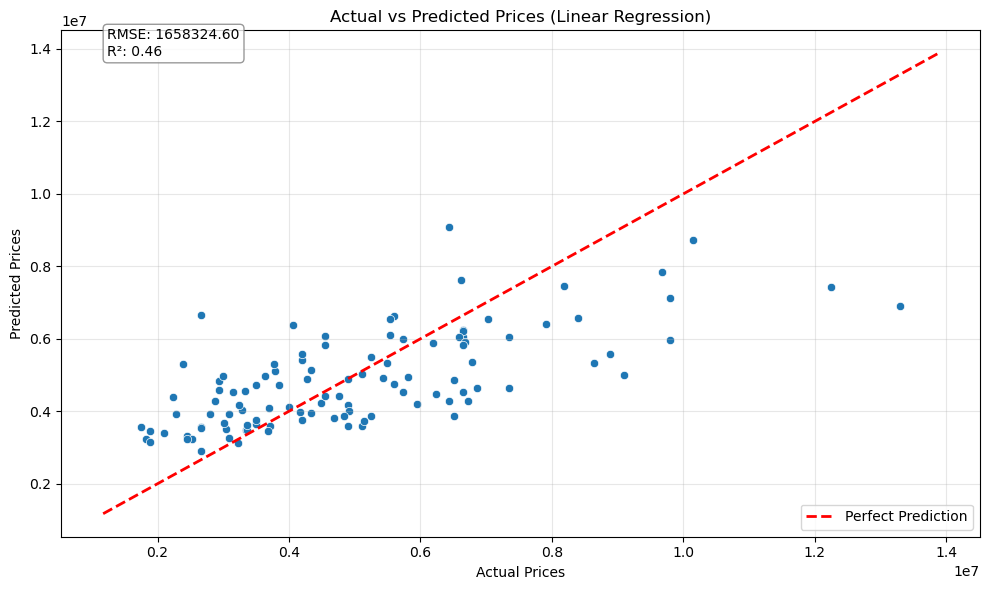

In [45]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
diagonal = np.linspace(*plt.xlim())
plt.plot(diagonal, diagonal, '--r', linewidth=2, label='Perfect Prediction')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices (Linear Regression)')
plt.legend()
plt.grid(True, alpha=0.3)
from sklearn.metrics import mean_squared_error, r2_score
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
plt.annotate(f'RMSE: {rmse:.2f}\nR²: {r2:.2f}', 
             xy=(0.05, 0.95), xycoords='axes fraction',
             bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))

plt.tight_layout()
plt.show()